In [1]:
# this is unrelated to the class .. It just helps displaying all outputs in a cell instead of just last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

This project is for the class of OPS802. The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [2]:
# Solve Here
# # Solve Here
# #load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
# Now let's do some exploring
import numpy as np
import pandas as pd
iris_headers=['Sepal_length','Sepal_width','Petal_length','Petal_width','Species']
data=pd.read_csv("iris_not_clean.data", sep="|", header=None,names=iris_headers, skiprows=[1,34])
data.head(4)  # To see how the data looks.


# How many rows and colums are in the file
print(data.shape)

#How many nulls in the file
(data.isna().sum()).sum()

#Which rows contains nans and how many nans in each of these rows
data[data.isna().any(axis=1)]
rowna_count=data.isna().sum(axis=1)
rowna_count[rowna_count>0]

# How many nans per columns?
data.isna().sum()

#The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. 
#Is that what you have? If not, fix it
data.iloc[34]
data.iloc[34]=[4.9,3.1,1.5,0.2,"Iris-setosa"]
data.iloc[34]

# The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa", where the errors are in the second
# and third features. Fix it
data.iloc[38]
data.iloc[38]=[4.9,3.6,1.4,0.1,"Iris-setosa"]
data.iloc[38]


#What is the mean and variance for each column and use the function describe to get 
#insights about the data
data.describe()

stats=pd.DataFrame()

stats["mean"]=data.mean()
print("The columnwise mean is "+"\n"+ str(stats["mean"])+"\n")



stats["Var"]=data.var()
print("The variance for each column"+ "\n" + str(stats["Var"]))


,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


(153, 5)


9

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
28,5.2,3.4,NaN,0.2,Iris-setosa
29,NaN,NaN,NaN,NaN,NaN
44,NaN,3.2,2.1,NaN,NaN


28    1
29    5
44    3
dtype: int64

Sepal_length    2
Sepal_width     1
Petal_length    2
Petal_width     2
Species         2
dtype: int64

Sepal_length            5.5
Sepal_width             4.2
Petal_length            1.4
Petal_width             0.2
Species         Iris-setosa
Name: 34, dtype: object

Sepal_length            4.9
Sepal_width             3.1
Petal_length            1.5
Petal_width             0.2
Species         Iris-setosa
Name: 34, dtype: object

Sepal_length            4.9
Sepal_width             3.1
Petal_length            1.5
Petal_width             0.1
Species         Iris-setosa
Name: 38, dtype: object

Sepal_length            4.9
Sepal_width             3.6
Petal_length            1.4
Petal_width             0.1
Species         Iris-setosa
Name: 38, dtype: object

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,151.000000,152.000000,151.000000,151.000000
mean,5.829801,3.053289,3.747020,1.192053
std,0.836644,0.423939,1.764608,0.764942
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The columnwise mean is 
Sepal_length    5.829801
Sepal_width     3.053289
Petal_length    3.747020
Petal_width     1.192053
Name: mean, dtype: float64

The variance for each column
Sepal_length    0.699973
Sepal_width     0.179724
Petal_length    3.113841
Petal_width     0.585136
Name: Var, dtype: float64


# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per feature, i.e. grouped by features

In [3]:
# Solve Here
# Cleaning the data and dropping the nan rows
data[data.isna().any(axis=1)]
data.dropna(inplace=True)
data[data.isna().any(axis=1)]



# For changin data type of column from object to float
data.Sepal_length=pd.to_numeric(data.Sepal_length)

#Recaluclating the mean and variance for each column
data.describe()

stats=pd.DataFrame()

stats["mean"]=data.mean()
print("The columnwise mean is "+"\n"+ str(stats["mean"])+"\n")



stats["Var"]=data.var()
print("The variance for each column"+ "\n" + str(stats["Var"]))

#What is the correlation between the fourth column and each of the other 
#three columns individually? Any observations
data['Petal_width'].corr(data['Petal_length'])
data['Petal_width'].corr(data['Sepal_width'])
data['Petal_width'].corr(data['Sepal_length'])
# Observations:
# Petal_width and Petal_length are positively correlated that is if one increases other 
# will also increase.
# Petal_width and Sepal_width are positively correlated that is if one increases other 
# will also increase.
# Petal_width and Sepal_length are negatively correlated that is if one increases other 
# will decrease.

print(data.shape)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
28,5.2,3.4,NaN,0.2,Iris-setosa
29,NaN,NaN,NaN,NaN,NaN
44,NaN,3.2,2.1,NaN,NaN


,Sepal_length,Sepal_width,Petal_length,Petal_width,Species


,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.834000,3.050000,3.758000,1.198667
std,0.837849,0.425646,1.765336,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The columnwise mean is 
Sepal_length    5.834000
Sepal_width     3.050000
Petal_length    3.758000
Petal_width     1.198667
Name: mean, dtype: float64

The variance for each column
Sepal_length    0.701991
Sepal_width     0.181174
Petal_length    3.116412
Petal_width     0.582414
Name: Var, dtype: float64


0.9628049458718135

-0.351855080637611

0.8230783463565982

(150, 5)


In [4]:
# How many records exist for each class. # Hint, you can do this in one line by using groupby
a=data.groupby('Species').Species.count()
a


import random
# Change the random seed to 1234 and randomly pick 20 samples of the data and display it.
np.random.seed(1234)
random_number=np.random.randint(0,152, size=20)
print(random_number)
generating_twenty_samples=data.iloc[random_number]
print(generating_twenty_samples)
generating_twenty_samples.shape

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

[ 47  38  53 116 143  23  30 124  26 118 120 112  69  80 127  50  76  37
  34 139]
     Sepal_length  Sepal_width  Petal_length  Petal_width          Species
50            5.3          3.7           1.5          0.2      Iris-setosa
40            5.1          3.4           1.5          0.2      Iris-setosa
56            5.5          2.3           4.0          1.3  Iris-versicolor
119           6.5          3.0           5.5          1.8   Iris-virginica
146           6.8          3.2           5.9          2.3   Iris-virginica
23            5.1          3.3           1.7          0.5      Iris-setosa
32            5.4          3.4           1.5          0.4      Iris-setosa
127           6.7          3.3           5.7          2.1   Iris-virginica
26            5.0          3.4           1.6          0.4      Iris-setosa
121           7.7          2.6           6.9          2.3   Iris-virginica
123           6.9          3.2           5.7          2.3   Iris-virginica
115           6.8

(20, 5)

In [5]:
# data.plot()
# data.hist(column=iris_headers)
# # iris.groupby("Name").PetalWidth.plot(kind='kde', ax=axs[1])
# # iris.groupby("Name").PetalWidth.hist(alpha=0.4, ax=axs[0])
# data.groupby
import matplotlib.pyplot as plt
_=plt.hist(data['iris_headers'],bins=20)
plt.show()

KeyError: 'iris_headers'

# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

In [ ]:
# Solve Here
# Use Scipy pdf fitting to do a curve fitting for the petal-length
#Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
import scipy.stats
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
f=plt.figure(figsize=(8,8))
x1=data.Petal_length
kde1=scipy.stats.kde.gaussian_kde(x1)
xs=np.linspace(x1.min()-1,x1.max()+1, len(x1))
plt.hist(x1, density=True, label='Normalised Histogram')
plt.plot(xs, kde1(xs), 'k-', label='Estimated Density')
 # shows the real distribution.
plt.xlabel('Petal-length')
plt.ylabel('Density')
plt.plot(xs, scipy.stats.norm.pdf(xs), 'r--', label="True PDF")
plt.legend()
plt.title('Normalised Histogram and estimated PDF')

#Generate new 500 samples using the estimated pdf for the petal-length
random_sample=np.random.normal(size=500)
data.iloc[x1]



### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

(150, 4)

(150, 3)

<BarContainer object of 3 artists>

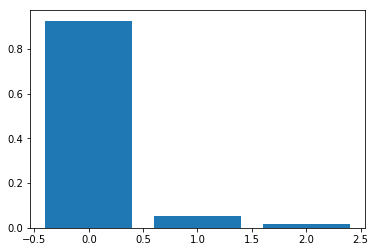

In [6]:
# Solve Here
# df1=data[['Sepal_length','Sepal_width','Petal_length','Petal_width']]
#print(df1)
#PCA is effected by scale so we need to scale the features in our data before applying PCA.
# Using StandardScaler to standardize the dataset's features
# onto unit scale(mean=0 and variance=1) which is a requirement for the optimal performance.
#Importing the necessary libraries.
#from sklearn.preprocessing import StandardScaler
features=['Sepal_length','Sepal_width','Petal_length','Petal_width']
target_features=['Species']
# Separating out the features.
x=data.loc[:,features].values
x.shape
target=data.loc[:,target_features].values
# Separating out the target.
#y=df1.loc[:,['target']].values
from sklearn.decomposition import PCA

pca_all=PCA()
# print(pca_all)
data_pca=pca_all.fit_transform(x)
# # pca_all.explained_variance_ratio_
# plt.bar(np.arange(4), pca_all.explained_variance_ratio_)
# # reduced_data_pca.shape
pca_reduced=PCA(n_components=3)
reduced_data_pca=pca_reduced.fit_transform(x)
reduced_data_pca.shape
plt.bar(np.arange(3), pca_reduced.explained_variance_ratio_)

# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[[ 2.37946283  0.25611535  0.05352193]
 [-2.64705158  0.18809832  0.01460689]
 [ 0.67633857 -0.30866612 -0.04458351]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


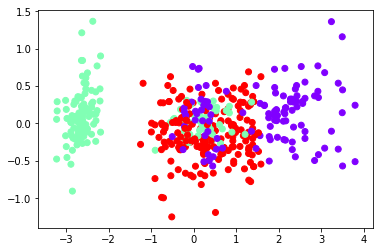

In [7]:
# Solve Here
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(reduced_data_pca)
print(kmeans.cluster_centers_)  
print(kmeans.labels_)
plt.scatter(reduced_data_pca[:,0],reduced_data_pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(reduced_data_pca[:,0],reduced_data_pca[:,2], c=kmeans.labels_, cmap='rainbow')
plt.scatter(reduced_data_pca[:,1],reduced_data_pca[:,2], c=kmeans.labels_, cmap='rainbow')

### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

In [ ]:
# Solve Here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reduced_data_pca, target,train_size=.80,test_size=.20)

X_train.shape
y_train.shape
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

In [ ]:
Validation_accuracy = logisticRegr.predict(X_test)
score1 = logisticRegr.score(X_test, y_test)
print(score1)
Training_accuracy = logisticRegr.predict(X_train)
score2 =  logisticRegr.score(X_train,y_train)
print(score2)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, Validation_accuracy)
print(cm)
import seaborn as sns; sns.set()  # for plot styling
species_names=np.unique(data.Species)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species_names,
            yticklabels=species_names)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel('true label')
plt.xlabel('predicted label');